<a href="https://colab.research.google.com/github/sujitojha1/EVA4/blob/rev3/S10/EVA4_S10_Solution_V4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement EVA 4, Session10 : CIFAR 10

**Target**: 


*   Make sure  to Add CutOut to your code. It should come from your transformations (albumentations)
*   Use this repo: https://github.com/davidtvs/pytorch-lr-finder (Links to an external site.) 
  *  Move LR Finder code to your modules
  *  Implement LR Finder (for SGD, not for ADAM)
  *  Implement ReduceLROnPlatea: https://pytorch.org/docs/stable/optim.html#torch.optim.lr_scheduler.ReduceLROnPlateau (Links to an external site.)
*   Find best LR to train your model
*   Use SDG with Momentum
*   Train for 50 Epochs. 
*   Show Training and Test Accuracy curves
*   Target Accuracy is 88%
*   Run GradCAM on the any 25 misclassified images. Make sure you mention what is the prediction and what was the ground truth label.
*   Submit answers to S10-Assignment-Solution. 

**Results**

*  Total Parameters = 11,173,962
*  After 50 Epochs, Final Train Accuracy = 94.92%
*  After 50 Epochs, Final Test Accuracy = 92.27%

**Analysis**

*  Target accuracy > 88% using Reset18 architecture. Model performance is good as train and test accuracy is small.

## 1. Loading Module and Models 

In [1]:
# Future print function
from __future__ import print_function

# Load modules/models from EVA course
!rm -rf EVA4
!git clone -b rev3 https://github.com/sujitojha1/EVA4 -q --quiet
print("Loaded EVA4 Modules and Models")

# Installing latest Albumentation library
!pip install -U git+https://github.com/albu/albumentations -q --quiet
#pip install apex -q

# For inline matplotlib plotting
%matplotlib inline

Loaded EVA4 Modules and Models
     |████████████████████████████████| 634kB 6.9MB/s 



## 2. Loading train and test data with transforms and loader functions

In [2]:
from EVA4.Modules import *

# Loading test and train data & dataloader
cifar10 = dataset_cifar10(batch_size=128)

# Train dataloader
trainloader = cifar10.loader(train_flag=True)

# Test dataloader
testloader = cifar10.loader(train_flag=False)

classes = cifar10.classes

  pip install torch-lr-finder -v --global-option="amp"


CUDA availability ? True


Extracting ./Data/cifar-10-python.tar.gz to ./Data
Files already downloaded and verified


## 3. Exploratory Data Analysis

### 3.1 Summary Statistics

In [3]:
cifar10.data_summary_stats()
#print(vars(train))

Files already downloaded and verified
Files already downloaded and verified
(60000, 32, 32, 3)
[0.49186878 0.48265391 0.44717728]
[0.24697121 0.24338894 0.26159259]


### 3.2 Plotting sample images

Files already downloaded and verified


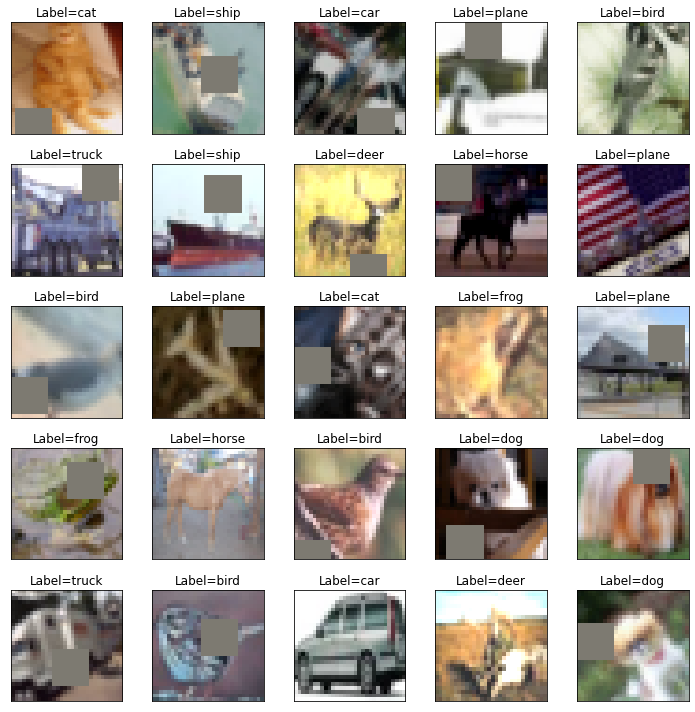

In [4]:
cifar10.sample_pictures(train_flag=True)

# The Model

In [5]:
from EVA4.Models import *

# Loading ResNet18 Model
net = ResNet18()

# Using cuda if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

# Sending network to device
net = net.to(device)

cuda


# Model Summary

In [6]:
!pip install torchsummary
from torchsummary import summary

# Model Summary
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

# Define a Loss function and optimizer

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()



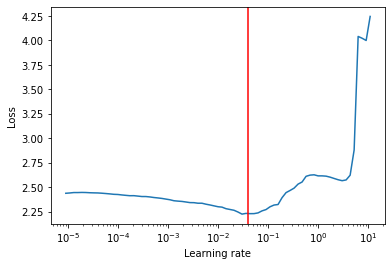

In [7]:
from EVA4.Modules import LRFinder
import torch.optim as optim

model = net
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-6, weight_decay=1e-2,momentum=0.9)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=100, num_iter=100)
lr_finder.plot(show_lr=0.040) # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial stat

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.040, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',factor=0.5, patience=10, verbose=True)

# Training and Testing

In [9]:
# Load train and test model
from EVA4.Modules import *

train = train()
test = test()

for epoch in range(50):  # loop over the dataset multiple times

    train.execute(net, device, trainloader, optimizer, criterion, epoch)
    test.execute(net, device, testloader, criterion)
    scheduler.step(train.train_acc[-1])

print('Finished Training')

  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 0


Loss=1.5307198762893677 Batch_id=390 Accuracy=37.45: 100%|██████████| 391/391 [00:32<00:00, 12.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0116, Accuracy: 4722/10000 (47.22%)


Epoch: 1


Loss=1.2361609935760498 Batch_id=390 Accuracy=52.39: 100%|██████████| 391/391 [00:32<00:00, 12.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0081, Accuracy: 6366/10000 (63.66%)


Epoch: 2


Loss=1.0466344356536865 Batch_id=390 Accuracy=61.23: 100%|██████████| 391/391 [00:32<00:00, 12.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0087, Accuracy: 6265/10000 (62.65%)


Epoch: 3


Loss=0.8243669271469116 Batch_id=390 Accuracy=66.52: 100%|██████████| 391/391 [00:32<00:00, 12.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7548/10000 (75.48%)


Epoch: 4


Loss=1.035971999168396 Batch_id=390 Accuracy=70.74: 100%|██████████| 391/391 [00:32<00:00, 12.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 7213/10000 (72.13%)


Epoch: 5


Loss=0.7478600740432739 Batch_id=390 Accuracy=73.49: 100%|██████████| 391/391 [00:32<00:00, 12.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7734/10000 (77.34%)


Epoch: 6


Loss=0.7095242142677307 Batch_id=390 Accuracy=75.48: 100%|██████████| 391/391 [00:32<00:00, 11.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 7499/10000 (74.99%)


Epoch: 7


Loss=0.5422913432121277 Batch_id=390 Accuracy=77.36: 100%|██████████| 391/391 [00:32<00:00, 12.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8147/10000 (81.47%)


Epoch: 8


Loss=0.6191492676734924 Batch_id=390 Accuracy=78.70: 100%|██████████| 391/391 [00:32<00:00, 12.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8314/10000 (83.14%)


Epoch: 9


Loss=0.6483983993530273 Batch_id=390 Accuracy=80.07: 100%|██████████| 391/391 [00:32<00:00, 12.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8541/10000 (85.41%)


Epoch: 10


Loss=0.5552502274513245 Batch_id=390 Accuracy=81.08: 100%|██████████| 391/391 [00:32<00:00, 12.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8399/10000 (83.99%)


Epoch: 11


Loss=0.39592868089675903 Batch_id=390 Accuracy=82.05: 100%|██████████| 391/391 [00:32<00:00, 11.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8575/10000 (85.75%)

Epoch    12: reducing learning rate of group 0 to 2.0000e-02.

Epoch: 12


Loss=0.3668302595615387 Batch_id=390 Accuracy=84.81: 100%|██████████| 391/391 [00:32<00:00, 11.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8772/10000 (87.72%)


Epoch: 13


Loss=0.31921523809432983 Batch_id=390 Accuracy=85.50: 100%|██████████| 391/391 [00:32<00:00, 11.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8844/10000 (88.44%)


Epoch: 14


Loss=0.35496068000793457 Batch_id=390 Accuracy=86.29: 100%|██████████| 391/391 [00:32<00:00, 12.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8831/10000 (88.31%)


Epoch: 15


Loss=0.3169541656970978 Batch_id=390 Accuracy=86.53: 100%|██████████| 391/391 [00:32<00:00, 12.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8868/10000 (88.68%)


Epoch: 16


Loss=0.29660892486572266 Batch_id=390 Accuracy=87.28: 100%|██████████| 391/391 [00:32<00:00, 12.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 8872/10000 (88.72%)


Epoch: 17


Loss=0.6091858148574829 Batch_id=390 Accuracy=87.51: 100%|██████████| 391/391 [00:32<00:00, 12.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8863/10000 (88.63%)


Epoch: 18


Loss=0.2265593260526657 Batch_id=390 Accuracy=87.90: 100%|██████████| 391/391 [00:32<00:00, 12.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8861/10000 (88.61%)


Epoch: 19


Loss=0.3290961682796478 Batch_id=390 Accuracy=88.20: 100%|██████████| 391/391 [00:32<00:00, 12.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8901/10000 (89.01%)


Epoch: 20


Loss=0.3184393048286438 Batch_id=390 Accuracy=88.30: 100%|██████████| 391/391 [00:32<00:00, 11.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 8934/10000 (89.34%)


Epoch: 21


Loss=0.2310897409915924 Batch_id=390 Accuracy=88.79: 100%|██████████| 391/391 [00:32<00:00, 12.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 8922/10000 (89.22%)


Epoch: 22


Loss=0.563793420791626 Batch_id=390 Accuracy=89.18: 100%|██████████| 391/391 [00:32<00:00, 12.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8845/10000 (88.45%)

Epoch    23: reducing learning rate of group 0 to 1.0000e-02.

Epoch: 23


Loss=0.34415239095687866 Batch_id=390 Accuracy=90.71: 100%|██████████| 391/391 [00:32<00:00, 12.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9077/10000 (90.77%)


Epoch: 24


Loss=0.27261048555374146 Batch_id=390 Accuracy=91.15: 100%|██████████| 391/391 [00:32<00:00, 12.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9095/10000 (90.95%)


Epoch: 25


Loss=0.2338145226240158 Batch_id=390 Accuracy=91.23: 100%|██████████| 391/391 [00:32<00:00, 12.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9093/10000 (90.93%)


Epoch: 26


Loss=0.2646092474460602 Batch_id=390 Accuracy=91.53: 100%|██████████| 391/391 [00:32<00:00, 12.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9098/10000 (90.98%)


Epoch: 27


Loss=0.23325541615486145 Batch_id=390 Accuracy=91.77: 100%|██████████| 391/391 [00:32<00:00, 12.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9128/10000 (91.28%)


Epoch: 28


Loss=0.27423104643821716 Batch_id=390 Accuracy=91.89: 100%|██████████| 391/391 [00:32<00:00, 12.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9101/10000 (91.01%)


Epoch: 29


Loss=0.1374964416027069 Batch_id=390 Accuracy=92.15: 100%|██████████| 391/391 [00:32<00:00, 12.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9088/10000 (90.88%)


Epoch: 30


Loss=0.1989755630493164 Batch_id=390 Accuracy=92.13: 100%|██████████| 391/391 [00:32<00:00, 12.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9113/10000 (91.13%)


Epoch: 31


Loss=0.25055065751075745 Batch_id=390 Accuracy=92.29: 100%|██████████| 391/391 [00:32<00:00, 12.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9102/10000 (91.02%)


Epoch: 32


Loss=0.24671649932861328 Batch_id=390 Accuracy=92.49: 100%|██████████| 391/391 [00:32<00:00, 11.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 9053/10000 (90.53%)


Epoch: 33


Loss=0.20872600376605988 Batch_id=390 Accuracy=92.61: 100%|██████████| 391/391 [00:32<00:00, 11.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9105/10000 (91.05%)

Epoch    34: reducing learning rate of group 0 to 5.0000e-03.

Epoch: 34


Loss=0.22465674579143524 Batch_id=390 Accuracy=93.23: 100%|██████████| 391/391 [00:32<00:00, 11.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9165/10000 (91.65%)


Epoch: 35


Loss=0.07838351279497147 Batch_id=390 Accuracy=93.62: 100%|██████████| 391/391 [00:32<00:00, 11.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9149/10000 (91.49%)


Epoch: 36


Loss=0.11245627701282501 Batch_id=390 Accuracy=93.59: 100%|██████████| 391/391 [00:33<00:00, 11.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 9151/10000 (91.51%)


Epoch: 37


Loss=0.28850123286247253 Batch_id=390 Accuracy=93.84: 100%|██████████| 391/391 [00:32<00:00, 11.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9155/10000 (91.55%)


Epoch: 38


Loss=0.1338232159614563 Batch_id=390 Accuracy=93.97: 100%|██████████| 391/391 [00:32<00:00, 11.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9178/10000 (91.78%)


Epoch: 39


Loss=0.30437999963760376 Batch_id=390 Accuracy=93.88: 100%|██████████| 391/391 [00:32<00:00, 11.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9180/10000 (91.80%)


Epoch: 40


Loss=0.2788003087043762 Batch_id=390 Accuracy=94.05: 100%|██████████| 391/391 [00:32<00:00, 11.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9192/10000 (91.92%)


Epoch: 41


Loss=0.1521812379360199 Batch_id=390 Accuracy=94.17: 100%|██████████| 391/391 [00:32<00:00, 11.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9217/10000 (92.17%)


Epoch: 42


Loss=0.1838924139738083 Batch_id=390 Accuracy=94.34: 100%|██████████| 391/391 [00:32<00:00, 12.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9190/10000 (91.90%)


Epoch: 43


Loss=0.1082393079996109 Batch_id=390 Accuracy=94.29: 100%|██████████| 391/391 [00:32<00:00, 12.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9190/10000 (91.90%)


Epoch: 44


Loss=0.11088796705007553 Batch_id=390 Accuracy=94.19: 100%|██████████| 391/391 [00:32<00:00, 12.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9204/10000 (92.04%)

Epoch    45: reducing learning rate of group 0 to 2.5000e-03.

Epoch: 45


Loss=0.10134240239858627 Batch_id=390 Accuracy=94.62: 100%|██████████| 391/391 [00:32<00:00, 12.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 9216/10000 (92.16%)


Epoch: 46


Loss=0.08263716101646423 Batch_id=390 Accuracy=94.95: 100%|██████████| 391/391 [00:32<00:00, 12.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9231/10000 (92.31%)


Epoch: 47


Loss=0.16168543696403503 Batch_id=390 Accuracy=94.66: 100%|██████████| 391/391 [00:32<00:00, 12.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9230/10000 (92.30%)


Epoch: 48


Loss=0.19302374124526978 Batch_id=390 Accuracy=94.78: 100%|██████████| 391/391 [00:32<00:00, 12.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 9211/10000 (92.11%)


Epoch: 49


Loss=0.2490001618862152 Batch_id=390 Accuracy=94.92: 100%|██████████| 391/391 [00:32<00:00, 12.12it/s]



Test set: Average loss: 0.0022, Accuracy: 9227/10000 (92.27%)

Finished Training


# Misclassified images


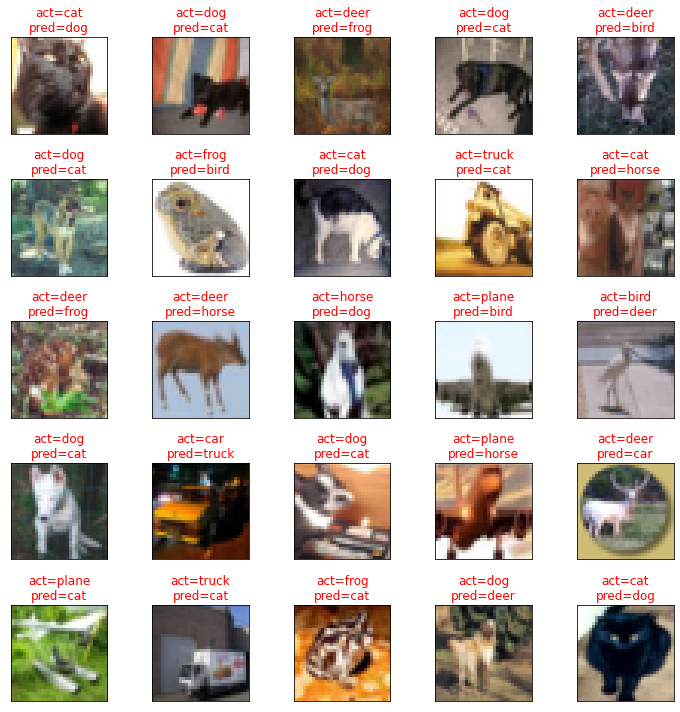

In [10]:
plot_misclassified_images(net,device,testloader,classes)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


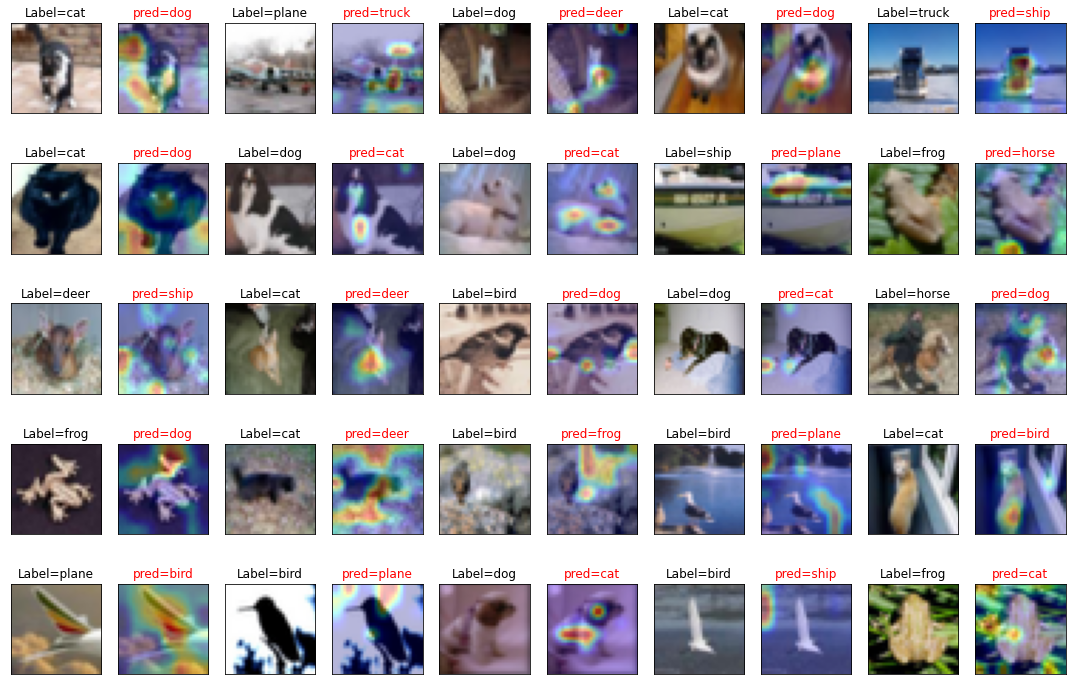

In [11]:
plot_misclassified_images_w_gradcam(net,device,testloader,classes)

# Plotting Train & Test Accuracy/Losses

# Evaluating test Accuracy over different classes 

In [12]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images,labels = images.to(device),labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 91 %
Accuracy of   car : 95 %
Accuracy of  bird : 87 %
Accuracy of   cat : 87 %
Accuracy of  deer : 87 %
Accuracy of   dog : 86 %
Accuracy of  frog : 93 %
Accuracy of horse : 91 %
Accuracy of  ship : 92 %
Accuracy of truck : 92 %


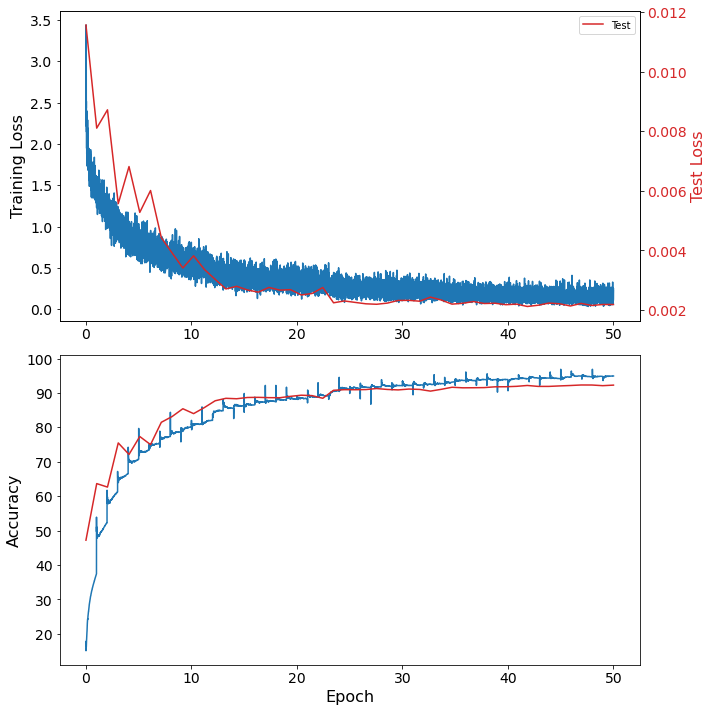

In [13]:
plot_train_test_acc_loss(train,test)